<a href="https://colab.research.google.com/github/N-Linh/ML/blob/main/svm_linear_separable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hard/large margin classification

In [18]:
from sklearn.svm import SVC
from sklearn import datasets

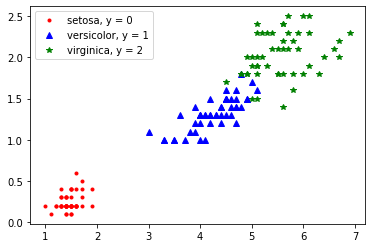

In [19]:
iris_data = datasets.load_iris()
X = iris_data["data"][:, (2, 3)]
y = iris_data["target"]#y = {0, 1, 2}['setosa', 'versicolor', 'virginica']
plt.plot(X[(y==0), 0], X[(y==0), 1], "r.", label="setosa, y = 0")
plt.plot(X[(y==1), 0], X[(y==1), 1], "b^", label="versicolor, y = 1")
plt.plot(X[(y==2), 0], X[(y==2), 1], "g*", label="virginica, y = 2")
plt.legend()

In [20]:
y, y[(y == 0) | (y == 1)]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

linear separability, y = 0 vs y = 1

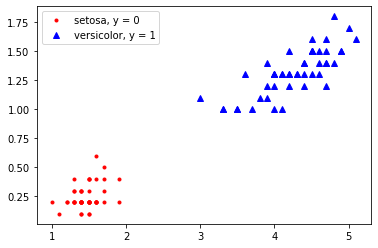

In [21]:
setosa_or_versicolor = (y == 0) | (y == 1)#y = True if y = 0, 1 else False if y = 2
X = X[setosa_or_versicolor]#get samples with label y = 0, y= 1
y = y[setosa_or_versicolor]
plt.plot(X[(y==0), 0], X[(y==0), 1], "r.", label="setosa, y = 0")
plt.plot(X[(y==1), 0], X[(y==1), 1], "b^", label="versicolor, y = 1")
plt.legend()

using linear SVM, sklearn

In [22]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [23]:
svm_clf.coef_, svm_clf.intercept_

(array([[1.29411744, 0.82352928]]), array([-3.78823471]))

In [24]:
def plot_svm(svm_clf, xmin, xmax):
  #w0x0 + w1x1 + b = 0, x1 = -w0x0/w1 - b/w1
  x0 = np.linspace(xmin, xmax, 200)
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  decision_bound = -w[0]*x0/w[1] - b/w[1]
  margin = 1/w[1]
  mar_ver = decision_bound + margin
  mar_set = decision_bound - margin
  plt.plot(x0, decision_bound, "k-", label="decision bound")
  plt.plot(x0, mar_ver, "k--")
  plt.plot(x0, mar_set, "k--")

(0.0, 5.5, 0.0, 2.0)

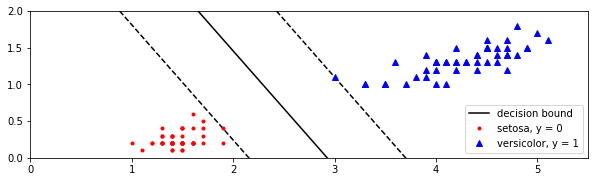

In [25]:
plt.figure(figsize=(10, 2.7))
plot_svm(svm_clf, 0, 5.5)
plt.plot(X[(y==0), 0], X[(y==0), 1], "r.", label="setosa, y = 0")
plt.plot(X[(y==1), 0], X[(y==1), 1], "b^", label="versicolor, y = 1")
plt.legend()
plt.axis([0, 5.5, 0, 2])

sensitivity to feature scales

In [26]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

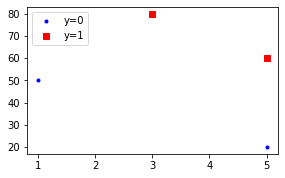

In [27]:
plt.figure(figsize=(4.5, 2.7))
plt.plot(Xs[(ys==0),0], Xs[(ys==0), 1], "b.", label="y=0")
plt.plot(Xs[(ys==1),0], Xs[(ys==1), 1], "rs", label="y=1")
plt.legend()

In [28]:
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

Text(0.5, 1.0, 'unscaled feature')

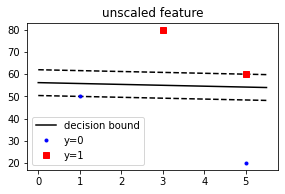

In [29]:
plt.figure(figsize=(4.5, 2.7))
plot_svm(svm_clf, 0, 5.5)
plt.plot(Xs[(ys==0),0], Xs[(ys==0), 1], "b.", label="y=0")
plt.plot(Xs[(ys==1),0], Xs[(ys==1), 1], "rs", label="y=1")
plt.legend()
plt.title("unscaled feature")

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

Text(0.5, 1.0, 'scaled feature')

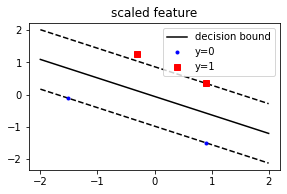

In [31]:
plt.figure(figsize=(4.5, 2.7))
plot_svm(svm_clf,-2, 2)
plt.plot(X_scaled[(ys==0),0], X_scaled[(ys==0), 1], "b.", label="y=0")
plt.plot(X_scaled[(ys==1),0], X_scaled[(ys==1), 1], "rs", label="y=1")
plt.legend()
plt.title("scaled feature")

soft margin classification, margin violation

In [97]:
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [98]:
X = iris_data["data"][:, (2, 3)]
# y = (iris_data["target"] == 2).astype(np.float64)#y = {0, 1, 2}['setosa', 'versicolor', 'virginica']
y = iris_data["target"]

In [99]:
versicolor_or_virginica = (y == 1) | (y == 2)#y = True if y = 0, 1 else False if y = 2
X = X[versicolor_or_virginica]#get samples with label y = 1, y= 2
y = y[versicolor_or_virginica]

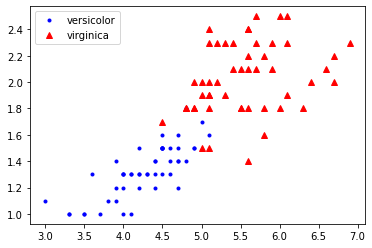

In [100]:
plt.plot(X[(y == 1), 0], X[(y == 1), 1], "b.", label="versicolor")
plt.plot(X[(y == 2), 0], X[(y == 2), 1], "r^", label="virginica")
plt.legend()

In [101]:
svm_clf = Pipeline([
          ("scaler", StandardScaler()),
          ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

compare 2 regularization C = 1, C = 100

In [102]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, loss = "hinge", random_state = 42)
svm_clf2 = LinearSVC(C = 100, loss = "hinge", random_state = 42)
svm_clf1_scaled = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf1)
])
svm_clf2_scaled = Pipeline([
              ("scaler", scaler),
              ("linear_svc", svm_clf2)
])
svm_clf1_scaled.fit(X, y)
svm_clf1_scaled.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [104]:
svm_clf1.fit(X, y)
svm_clf2.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, loss='hinge', random_state=42)

(4.0, 5.9, 0.8, 2.8)

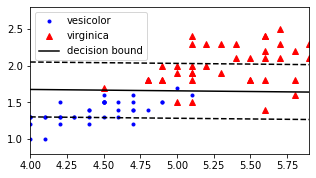

In [106]:
plt.figure(figsize=(5, 2.7))
plt.plot(X[(y == 1), 0], X[(y == 1), 1], "b.", label="vesicolor")
plt.plot(X[(y == 2), 0], X[(y == 2), 1], "r^", label="virginica")
plot_svm(svm_clf1, 4, 5.9)
plt.legend()
plt.axis([4, 5.9, 0.8, 2.8])

(4.0, 5.9, 0.8, 2.8)

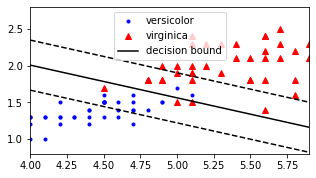

In [108]:
plt.figure(figsize=(5, 2.7))
plt.plot(X[(y == 1), 0], X[(y == 1), 1], "b.", label="versicolor")
plt.plot(X[(y == 2), 0], X[(y == 2), 1], "r^", label="virginica")
plot_svm(svm_clf2, 4, 5.9)
plt.legend()
plt.axis([4, 5.9, 0.8, 2.8])